# Evaluation of the results from shapley-multiLogReg.dml

In [1]:
# To debug the shap package, or output more information during computation, clone the git repo and add its path here.
# This will prepend the local installation of shap and makes sure it is imported in the next cell.

%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('/Users/louislepage/Documents/Gitlab/shap')) # or the path to your source code
sys.path.insert(0, module_path)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import sklearn as sk
import time

In [22]:
#load prepared data into dataframe
df_x = pd.read_csv("../data/adult/Adult_X.csv", header=None)
df_y = pd.read_csv("../data/adult/Adult_y.csv", header=None)
partitions = np.genfromtxt("../data/adult/Adult_partitions.csv", delimiter=',')

In [23]:
partitions

array([[  1.,  11.,  28.,  35.,  50.,  56.,  61.,  66.],
       [  9.,  26.,  34.,  49.,  55.,  60.,  62., 107.]])

In [24]:
#train model
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(df_x.values, df_y.values.ravel(), test_size=0.2, random_state=42)

model = sk.linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [25]:
#test model
y_pred = model.predict(X_test)
accuracy = sk.metrics.accuracy_score(y_test, y_pred)
conf_matrix = sk.metrics.confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8512206356517734
Confusion Matrix:
[[4617  325]
 [ 644  927]]


In [26]:
#create SHAP sampling explainer
#sampling_explainer = shap.explainers.SamplingExplainer(model.predict, df_x.values)
start = time.time()
permutation_explainer = shap.explainers.PermutationExplainer(model.predict_proba, df_x.values)
end = time.time()

total_t=end-start
print("The time of preparing the sampling explainer is :",
      total_t, "s")
#compute and measure time
def run_sampler_for(samples_per_feature):
      start = time.time()
      # Using n samples for each feature (107*n in total) to match systemds
      #shap_vals_sampling=sampling_explainer.explain(df_x.iloc[1:2].values, nsamples=107*samples_per_feature, min_samples_per_feature=samples_per_feature)
      shap_vals_sampling = permutation_explainer(df_x.iloc[1:2].values)
      end = time.time()
      
      total_t=end-start
      print("The time of execution of sampling explainer is :",
            total_t, "s") 
      return shap_vals_sampling, total_t


The time of preparing the sampling explainer is : 0.0012369155883789062 s


In [27]:
shap_vals_permutation, _ = run_sampler_for(1000)

[ 0  1  2  3  4  5  6  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 26 27
 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50 51 52 53
 54 55 56 57 58 60 61 62 63 64 65 68 69 70 74 90 91]
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  79  83   4   4  15  15   2   8   6   3   4   2  11   7   3   5   3
   4   5  15   1   1   9   2  34   2  23  12  10  55  83  97  12   8   5
   3   5  26   2   1   1  23  24   2   3   1  59   5   2   6   1  34   1
  24   1 100   1   1 100  90   6   7   1   2   4  79  83   4   4  15  15
   2   8   6   3   4   2  11   7   3   5   3   4   5  15   1   1   9   2
  34   2  23  12  10  55  83  97  12   8   5   3   5  26   2   1   1  23
  24   2   3   1  59   5   2   6   1  34   1  24   1 100   1   1 100  90
   6   7   1   2   4]
debug:2436
Delta: Calling model for 2436
107
batchsize: 10
masks: 131
DELTA
mask len: 131
masked inputs len:13100
num_varying_rows (len 131): [100  23   1   3   2   5  24 

In [9]:
shap_vals_permutation[..., 1].values

array([[ 9.60595965e-04, -5.14387957e-02, -9.88302050e-03,
        -2.79415186e-03,  1.84466528e-04,  1.24916487e-03,
        -1.03792356e-03,  0.00000000e+00,  0.00000000e+00,
        -1.11634886e-02,  4.15791261e-02,  6.59505488e-03,
         4.00964524e-03, -7.35484766e-03,  4.29147779e-04,
        -4.80904997e-04,  5.51567916e-04, -4.79973528e-04,
         9.06828885e-04, -7.36027296e-03, -5.32675111e-03,
         8.26788646e-04,  1.99721081e-03,  1.79361634e-04,
         0.00000000e+00,  0.00000000e+00,  4.69796394e-02,
         3.26996903e-02,  1.04101621e-01,  1.82255985e-02,
         4.33789524e-04,  2.46399729e-03,  0.00000000e+00,
         6.83331401e-04,  1.12368227e-04,  1.06737894e-01,
         4.73096036e-03, -1.22164692e-02,  6.27155546e-03,
        -5.87845775e-03, -9.54452541e-05,  1.37516243e-03,
         2.53917234e-03,  5.50062622e-03, -3.01918415e-03,
         1.43835112e-03, -1.71590133e-03,  0.00000000e+00,
         1.10138222e-03, -1.42871471e-02, -3.98325351e-0

In [17]:
shap_vals_permutation[..., 1].values

array([[ 9.60595965e-04, -5.14387957e-02, -9.88302050e-03,
        -2.79415186e-03,  1.84466528e-04,  1.24916487e-03,
        -1.03792356e-03,  0.00000000e+00,  0.00000000e+00,
        -1.11634886e-02,  4.15791261e-02,  6.59505488e-03,
         4.00964524e-03, -7.35484766e-03,  4.29147779e-04,
        -4.80904997e-04,  5.51567916e-04, -4.79973528e-04,
         9.06828885e-04, -7.36027296e-03, -5.32675111e-03,
         8.26788646e-04,  1.99721081e-03,  1.79361634e-04,
         0.00000000e+00,  0.00000000e+00,  4.69796394e-02,
         3.26996903e-02,  1.04101621e-01,  1.82255985e-02,
         4.33789524e-04,  2.46399729e-03,  0.00000000e+00,
         6.83331401e-04,  1.12368227e-04,  1.06737894e-01,
         4.73096036e-03, -1.22164692e-02,  6.27155546e-03,
        -5.87845775e-03, -9.54452541e-05,  1.37516243e-03,
         2.53917234e-03,  5.50062622e-03, -3.01918415e-03,
         1.43835112e-03, -1.71590133e-03,  0.00000000e+00,
         1.10138222e-03, -1.42871471e-02, -3.98325351e-0

In [3]:
#generate partitioned results from shap package
def getPartitionedResults(shap_values):
      tmp_partitioned_results = shap_values.copy()
      for i in range(len(partitions[0])):
            start = int(partitions[0][i])-1
            end   = int(partitions[1][i])-1
            #print("s "+str(start)+" e "+str(end))
            #print((shap_vals_permutation[..., 1].values[0][start:end+1]))
            tmp_partitioned_results[0][start] = sum(shap_values[0][start:end + 1])
            tmp_partitioned_results[0][start + 1:end + 1] = 0
      
      return tmp_partitioned_results

In [16]:
partitioned_pyshap = getPartitionedResults(shap_vals_permutation[..., 1].values)
partitioned_pyshap

array([[-0.06275966,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.01116349,
         0.03607198,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.04697964,  0.15860803,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.10688201,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.01015541,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00387206,  0.        ,  0.        ,  0.        ,  0.        ,
         0.03306674,  0.        , -0.02028069, -0.00938413, -0.12152063,
         0.00548327,  0.        ,  0.        ,  0. 

In [16]:
shap_vals_permutation[..., 1].values

array([[ 9.18863557e-04, -5.45399936e-02, -1.01121425e-02,
        -2.63525947e-03,  1.84663270e-04,  1.23595699e-03,
        -9.78034056e-04,  0.00000000e+00,  0.00000000e+00,
        -1.16127933e-02,  4.17540946e-02,  6.43253974e-03,
         4.03606444e-03, -7.67828077e-03,  3.37675714e-04,
        -5.13200849e-04,  6.01876990e-04, -5.04884768e-04,
         6.70647882e-04, -7.38552718e-03, -5.97430179e-03,
         8.34898483e-04,  1.92003131e-03,  8.44140505e-05,
         0.00000000e+00,  0.00000000e+00,  5.18365494e-02,
         3.39011213e-02,  9.65682958e-02,  1.84697391e-02,
         5.77729934e-04,  3.55435593e-03,  0.00000000e+00,
         7.40809610e-04,  1.12894730e-04,  1.09829861e-01,
         4.97227464e-03, -1.26792744e-02,  7.20947597e-03,
        -6.06954302e-03, -8.99115021e-05,  1.36878676e-03,
         2.83419888e-03,  6.02990122e-03, -2.81420835e-03,
         1.25878715e-03, -1.84890869e-03,  0.00000000e+00,
         1.40578073e-03, -1.58572386e-02, -4.34975854e-0

In [28]:
# load results from systemds implementation
df_comp = pd.read_csv("../data/Adult_shap-values_permutation_3perm_100samples_partitions.csv", header=None, names=['systemds_shap'])

df_nonpart = pd.read_csv("../data/Adult_shap-values_permutation_3perm_100samples.csv", header=None, names=['systemds_shap'])
# add results from SHAP package
partitioned_results = getPartitionedResults(shap_vals_permutation[..., 1].values.copy())
#nonpart_partitioned_results = getPartitionedResults(np.transpose(df_nonpart.systemds_shap_nonpart))
#df_comp['python_shap']=np.transpose(shap_vals_permutation[..., 1].values) #shap_vals_sampling
df_comp['python_shap']=np.transpose(partitioned_results)
df_nonpart['python_shap']=np.transpose(shap_vals_permutation[..., 1].values)
#df_comp['systemds_shap_nonpart']=np.transpose(nonpart_partitioned_results) #shap_vals_sampling

df_comp

,systemds_shap,python_shap
0,-0.058166,-0.064781
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
102,0.000000,0.000000
103,0.000000,0.000000
104,0.000000,0.000000
105,0.000000,0.000000


0      0.001281
1     -0.044389
2     -0.009439
3     -0.003465
4      0.000401
         ...   
102    0.000000
103    0.000000
104    0.000000
105    0.000000
106    0.000000
Name: systemds_shap_nonpart, Length: 107, dtype: float64

9.373892397640242e-06


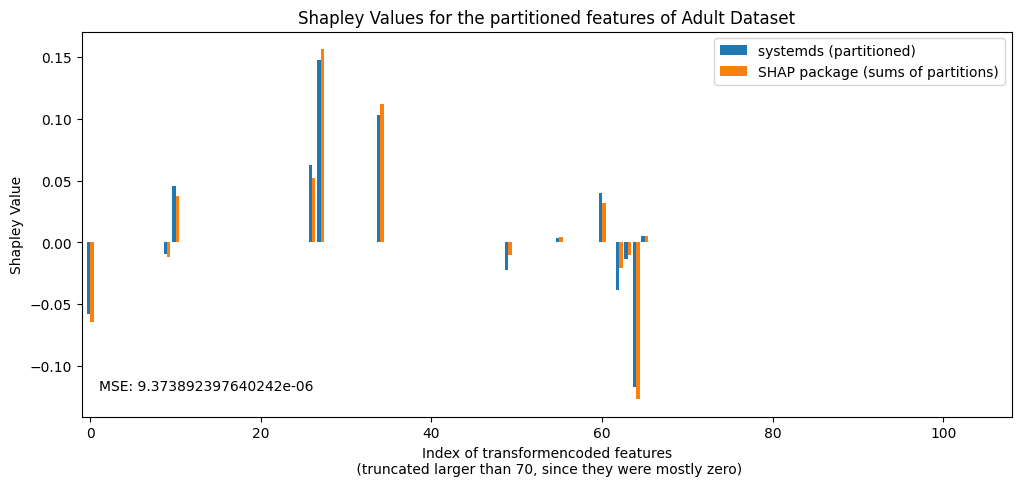

In [33]:
import matplotlib.pyplot as plt
barWidth = 0.4  # Width of the bars
positions = np.arange(len(df_comp))

mse = sk.metrics.mean_squared_error(df_comp.python_shap, df_comp.systemds_shap)
print(mse)

plt.figure(figsize=(12,5))
plt.bar(positions-barWidth/2 , df_comp.systemds_shap, label="systemds (partitioned)", width=barWidth)
plt.bar(positions+barWidth/2 , df_comp.python_shap, label="SHAP package (sums of partitions)", width=barWidth)

plt.text(1, -0.12, 'MSE: '+str(mse))

# Additional plot formatting
plt.title('Shapley Values for the partitioned features of Adult Dataset')
plt.xlabel('Index of transformencoded features\n (truncated larger than 70, since they were mostly zero)')
plt.ylabel('Shapley Value')
plt.xlim(-1,108)

plt.legend()
plt.savefig("../data/adult/adult_accuracy_partitions.pdf")

9.419317979044648e-06


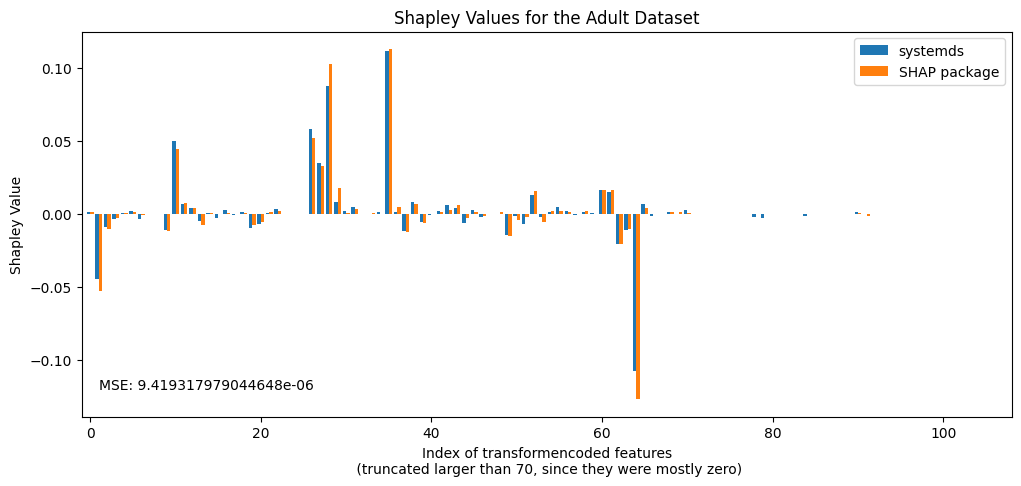

In [34]:
import matplotlib.pyplot as plt
barWidth = 0.4  # Width of the bars
positions = np.arange(len(df_nonpart))

mse = sk.metrics.mean_squared_error(df_nonpart.python_shap, df_nonpart.systemds_shap)
print(mse)

plt.figure(figsize=(12,5))
plt.bar(positions-barWidth/2 , df_nonpart.systemds_shap, label="systemds", width=barWidth)
plt.bar(positions+barWidth/2 , df_nonpart.python_shap, label="SHAP package", width=barWidth)

plt.text(1, -0.12, 'MSE: '+str(mse))

# Additional plot formatting
plt.title('Shapley Values for the Adult Dataset')
plt.xlabel('Index of transformencoded features\n (truncated larger than 70, since they were mostly zero)')
plt.ylabel('Shapley Value')
plt.xlim(-1,108)

plt.legend()
plt.savefig("../data/adult/adult_accuracy.pdf")


In [4]:
# census
from joblib import load
model = load("../data/census/l2svm.joblib")
df_x = pd.read_csv("../data/census/census_xTrain.csv", header=None)
df_y = pd.read_csv("../data/census/census_yTrain_corrected.csv", header=None)
partitions = np.genfromtxt("../data/census/census_dummycoding_partitions.csv", delimiter=',')

df_x.loc[[0]]



,0,1,2,3,4,5,6,7,8,9,...,361,362,363,364,365,366,367,368,369,370
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
#test model
y_pred = model.predict(df_x)
accuracy = sk.metrics.accuracy_score(df_y, y_pred)
conf_matrix = sk.metrics.confusion_matrix(df_y, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 1.0
Confusion Matrix:
[[16425     0]
 [    0 13575]]


In [6]:
df_x.loc[[0]].shape

(1, 371)

In [7]:
bias = np.genfromtxt("../data/census/census_bias.csv", delimiter=',')
bias.shape

(371,)

In [8]:

def l2svmPredict(X):
      W=bias
      n, m = X.shape
      wn = len(W)
      if m != wn:
            YRaw = np.dot(X, W[:m-1]) + W[m]
      else:
            YRaw = np.dot(X, W)
      return YRaw
            

In [9]:
permutation_explainer_census = shap.explainers.PermutationExplainer(l2svmPredict, df_x.values)
shap_vals_census = permutation_explainer_census(df_x.loc[[0]], max_evals=1000)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  20  21  22  23
  24  26  32  34  37  38  39  41  42  43  44  45  46  47  48  49  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  69  70  71  72
  73  74  76  77  78  80  85  86  87  88  91  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 118 119 120 121 122
 123 124 127 128 129 130 131 132 133 134 137 138 139 140 141 142 143 144
 145 146 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 178 179 180 181 183 184 185 186 187 188 189 190 191 192
 193 194 195 198 199 200 201 202 203 205 206 207 208 210 211 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 228 229 230 231 234 235 236
 239 241 242 244 245 252 253 254 255 256 257 258 259 260 266 267 268 269
 273 274 275 276 277 278 279 281 282 283 284 286 289 290 291 292 293 294
 295 296 297 298 301 302 303 304 307 310 311 312 313 316 317 318 321 322
 323 326 327 329 330 331 332 333 334 335 337 338 33

In [33]:
l2svmPredict(df_x.loc[0:10])

(371,)


array([ 3.6178902 ,  2.82493816,  2.89744377,  2.97409025, -2.93477521,
       -2.21688941, -2.07704603,  2.02205504, -2.95816099, -2.14043882,
        3.18058958])

In [13]:
shap_vals_census.base_values

array([0.29899311])

In [10]:
df_comp = pd.read_csv("../data/census/shap-values_permutation_3perm_100samples_partitions.csv", header=None, names=['systemds_shap'])
df_nonpart = pd.read_csv("../data/census/shap-values_permutation_3perm_100samples.csv", header=None, names=['systemds_shap'])


# add results from SHAP package
partitioned_results = getPartitionedResults(shap_vals_census.values.copy())

df_comp['python_shap']=np.transpose(partitioned_results)
df_nonpart['python_shap']=np.transpose(shap_vals_census.values)

1.932736228022406e-05


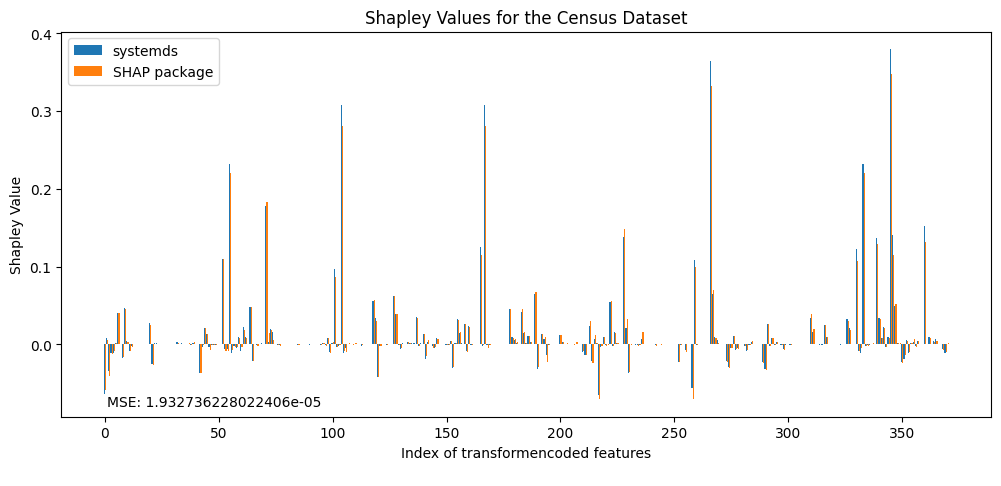

In [16]:
import matplotlib.pyplot as plt
barWidth = .5  # Width of the bars
positions = np.arange(len(df_nonpart))

mse = sk.metrics.mean_squared_error(df_nonpart.python_shap, df_nonpart.systemds_shap)

print(mse)

plt.figure(figsize=(12,5))
plt.bar(positions-barWidth/2 , df_nonpart.systemds_shap, label="systemds", width=barWidth)
plt.bar(positions+barWidth/2 , df_nonpart.python_shap, label="SHAP package", width=barWidth)

plt.text(1, -0.08, 'MSE: '+str(mse))

# Additional plot formatting
plt.title('Shapley Values for the Census Dataset')
plt.xlabel('Index of transformencoded features\n')
plt.ylabel('Shapley Value')

plt.legend()
plt.savefig("../data/census/census_accuracy.pdf")

9.373892397640242e-06


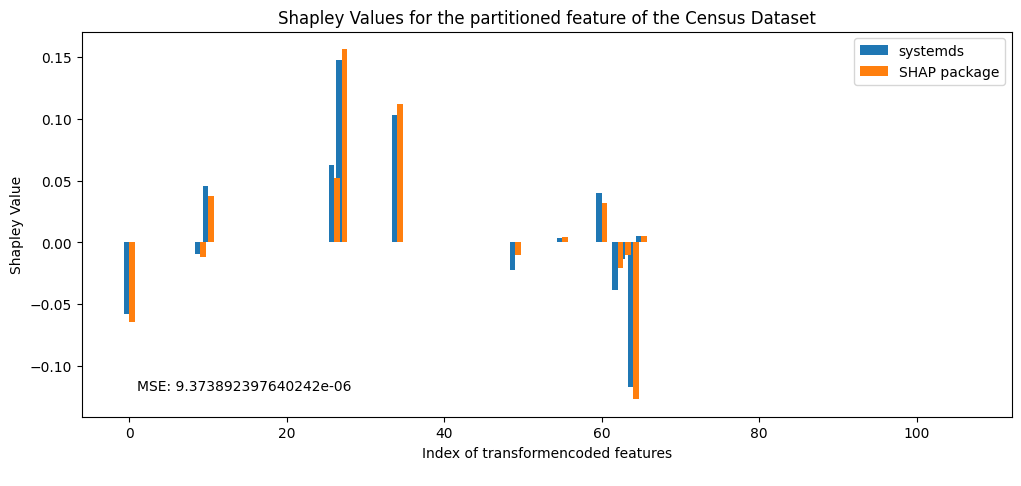

In [35]:
import matplotlib.pyplot as plt
barWidth = 0.7  # Width of the bars
positions = np.arange(len(df_comp))

mse = sk.metrics.mean_squared_error(df_comp.python_shap, df_comp.systemds_shap)

print(mse)

plt.figure(figsize=(12,5))
plt.bar(positions-barWidth/2 , df_comp.systemds_shap, label="systemds", width=barWidth)
plt.bar(positions+barWidth/2 , df_comp.python_shap, label="SHAP package", width=barWidth)

plt.text(1, -0.12, 'MSE: '+str(mse))

# Additional plot formatting
plt.title('Shapley Values for the partitioned feature of the Census Dataset')
plt.xlabel('Index of transformencoded features\n')
plt.ylabel('Shapley Value')

plt.legend()
plt.savefig("../data/census/census_accuracy_partitions.pdf")